In [1]:
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_iris

X:
[[1 2 3]
 [4 5 6]]

Identity:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Scipy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


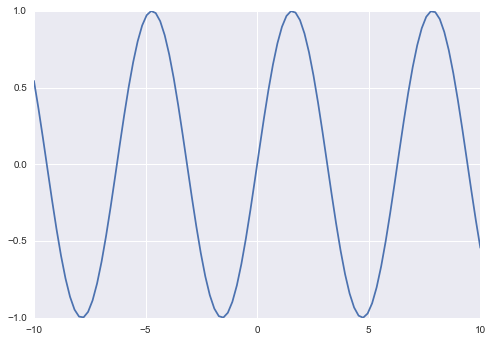

In [2]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print('X:\n{}'.format(x))

identity = np.eye(4)
print('\nIdentity:\n{}'.format(identity))

sparse_matrix = sparse.csr_matrix(identity)
print('\nScipy sparse CSR matrix:\n{}'.format(sparse_matrix))

data = np.ones(4)
row_indices = np.arange(4)
column_indices = np.arange(4)
identity_coo = sparse.coo_matrix((data, (row_indices, column_indices)))
print('\nCOO representation:\n{}'.format(identity_coo))

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine function
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker='x')

In [3]:
data = {'Name': ['Alvin', 'Michael', 'Mike', 'Linda'],
       'Location': ['San Francisco', 'Paris', 'Berlin', 'Austin'],
       'Age': [21, 24, 33, 53]}
data_pandas = pd.DataFrame(data)

display(data_pandas)
display(data_pandas[data_pandas.Age > 30])

,Age,Location,Name
0,21,San Francisco,Alvin
1,24,Paris,Michael
2,33,Berlin,Mike
3,53,Austin,Linda


,Age,Location,Name
2,33,Berlin,Mike
3,53,Austin,Linda


In [5]:
iris_dataset = load_iris()
print('Keys of iris_dataset: \n{}'.format(iris_dataset.keys()))

# Beginning of the description of iris dataset
print(iris_dataset['DESCR'][:193] + '\n')

# Target names
print('Target names: {}'.format(iris_dataset['target_names']))

# Feature names
print('\nFeature names: \n{}'.format(iris_dataset['feature_names']))

# Data type
print('\nType of data: {}'.format(type(iris_dataset['data'])))

# Preview of data
print('\nFirst five columns of data:\n{}'.format(iris_dataset['data'][:5]))

# Target type
print('\nType of target: {}'.format(type(iris_dataset['target'])))

# Shape
print('\nShape of target: {}'.format(iris_dataset['target'].shape))

# Target
print('\nTarget:\n{}'.format(iris_dataset['target']))

Keys of iris_dataset: 
dict_keys(['data', 'target_names', 'feature_names', 'target', 'DESCR'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att

Target names: ['setosa' 'versicolor' 'virginica']

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Type of data: <class 'numpy.ndarray'>

First five columns of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]

Type of target: <class 'numpy.ndarray'>

Shape of target: (150,)

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


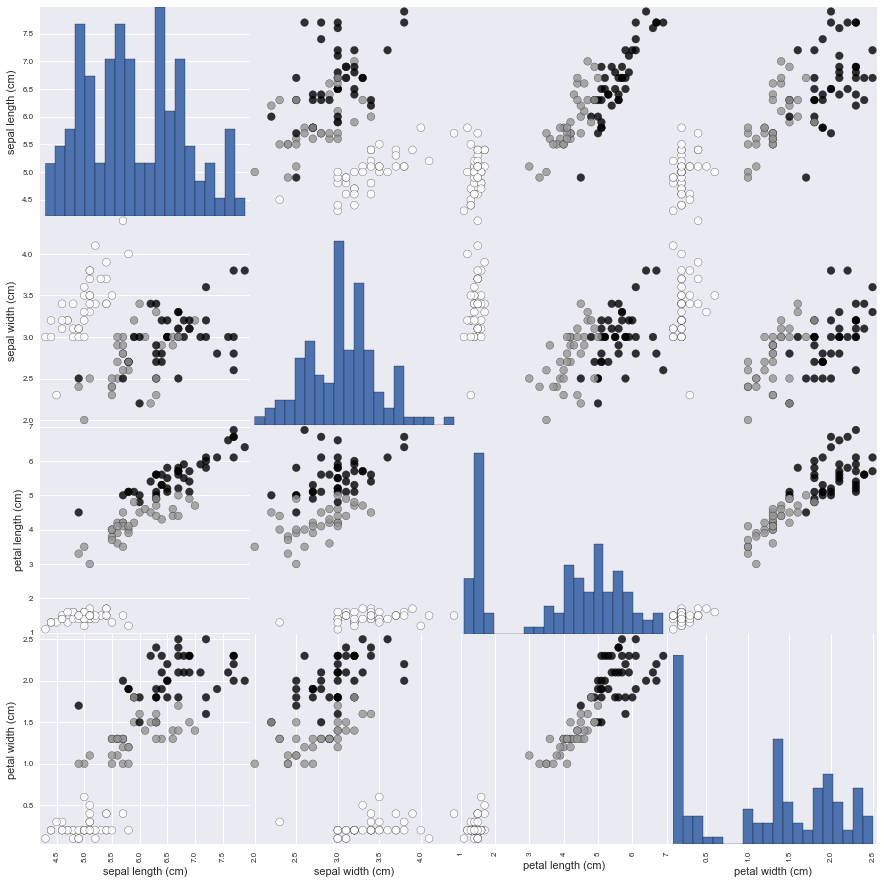

In [8]:
from sklearn.cross_validation import train_test_split

# Splitting up the data to prepare the cross validation
# It is important to shuffle the data so the model won't be overfitting/underfitting
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

# Printing out train/test data
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

# Printing out train/test label
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

# Create dataframe from data in X_train
# Label the columns using strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# Create a scatter matrix from the dataframe, color by y_train
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=0.8)

In [10]:
# Using K-nearest neightbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Making up a new sample to test out the model
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape: {}'.format(X_new.shape))

# Predicting X_new
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Predicted target name: {}'.format(iris_dataset['target_names'][prediction]))

# Predicting on the test set
y_pred = knn.predict(X_test)
print('Test set prediction:\n {}'.format(y_pred))

# Getting the score of the model
print('Test set score: {:.2f}'.format(np.mean(y_pred == y_test)))
print('Test set score using knn.score: {:.2f}'.format(knn.score(X_test, y_test)))

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']
Test set prediction:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score using knn.score: 0.97
